# Análisis de la Inflación - Serie Especial Alimentos 
### Regiones de Arica y Metropolitana (Consolidada, Oriente, Poniente, Sur, Norte y Centro)

En base a los precios de la Oficina de estudios y Políticas Agrarias del Ministerio de Agricultura,<br>
se pide calcular la inflación mensual y anual, para el subconjunto de bienes allí disponibles <br>
en el perÌodo 2014 : 11  -  2018 : 07 (www.odepa.gob.cl):

Universidad del Desarrollo – UDD<br>
Escuela de Ingeniería<br>
Instituto de Data Science<br>

__Trabajo Final - ADDENDUM:__
- Macroeconomía para Data Science: Profesor: Mercedes Haga 
- Python para Análisis de Datos: Profesor Ismael Botti 


__Integrantes:__
- Alfaro, Christian
- Briceño, Heriberto
- Rovai, Marcelo
- Sacasa, Manuel<br>

Santiago, 03 septiembre de 2018

---

## Funciones específicas para uso en el cálculo de la inflación 

In [1]:
def plot_df(df, x_size = 12, y_size = 8, ylim = None, x_axis = 'año', y_axis = None, title = 'Grafico',  ):
    '''
    Plota grafica de un dataset en el tiempo
    '''
    ax = df.plot(figsize=(x_size,y_size), ylim = ylim, title=title)
    # set labels for both axes
    ax.set(xlabel=x_axis, ylabel = y_axis)
    plt.show()

In [2]:
def inflacion_periodo(df, n, per=1):
    '''
    para "n" productos en el dataset "df", calcula la inflacion para
    un dado numero de períodos "per" en meses.
    '''
    tabla = pd.DataFrame(index=set(df.index))
    for i in range(n):
        var = (df.iloc[:, [i]].pct_change(periods=per,axis = 0))*100
        tabla = pd.concat([tabla, var], axis = 1) 
    
    return tabla

In [3]:
def calc_inf(pit, w):
    '''
    A partir de los precios 'pit' (precios ponderados por producto en el tiempo),
    calcula un tabla de inflación, llevandose en consideración los ponderadores especiales
    'w'. Retorna una tabla de la inflacion mensual para la región. 
    '''
    inf = pd.DataFrame(index=set(pit.index))
    for i in range(len(w)):
        var = pit.iloc[:, [i]]*w[i]/100
        inf = pd.concat([inf, var], axis = 1)
    inf['Inflacion'] = inf.apply(sum, axis = 1)    
    return inf

In [4]:
def monta_inf(region, per=1):
    '''
    A partir del directorio de una 'region' retorna tabla completa 
    de la inflación por producto  
    para un numero de periodos 'per'
    '''
    tabla = carga_region(region)
    w, N = carga_w()    
    tabla = inflacion_periodo(tabla, N, per)
    inf = calc_inf(tabla, w)
    return inf

---

## Parte A - Inflación Mensual y Anual para Arica

In [5]:
from ipc_especial import * # moneda = True

### 1. Ejemplo de cálculo de la inflación para un producto en una región

In [6]:
precios_ar = carga_region('data/data_ar')

In [7]:
precios_ar.head()

,Aceite,Azucar,Carnes,Cereales,Frutas,Harina,Hortalizas,Huevos,Lacteos,Legumbres,Pan
2014-11-01,1433.288659,596.7472,4796.541288,774.420230,1970.603229,673.536830,891.913586,1785.128662,1911.546260,1991.273867,1232.990524
2014-12-01,1419.447576,602.8949,4788.249365,751.399775,2000.774775,681.316749,899.472028,1789.974001,1911.287110,2005.795830,1239.411253
2015-01-01,1435.792918,599.0077,4746.662580,759.202254,1969.316035,706.646553,873.197130,1724.275486,1898.949681,2014.258657,1220.230673
2015-02-01,1433.696421,594.8461,4752.508978,769.686844,1942.461246,720.736136,860.404796,1743.854199,1930.097913,2033.484022,1216.015834
2015-03-01,1456.574967,596.4789,4729.433043,773.091471,1883.191151,710.610208,843.559198,1766.504028,1911.442768,2013.529172,1215.660280


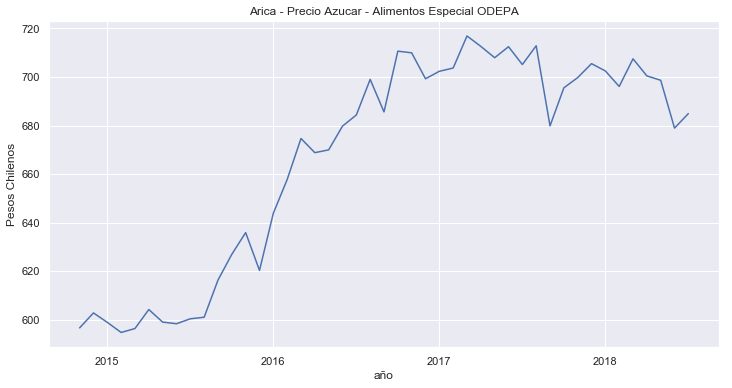

In [8]:
plot_df(precios_ar.Azucar, 12, 6, y_axis='Pesos Chilenos', title='Arica - Precio Azucar - Alimentos Especial ODEPA')

__Inflación mensual Arica__

In [9]:
inf_mo_ar = inflacion_periodo(precios_ar, 11, 1)

In [10]:
inf_mo_ar.head()

,Aceite,Azucar,Carnes,Cereales,Frutas,Harina,Hortalizas,Huevos,Lacteos,Legumbres,Pan
2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01,-0.965687,1.030202,-0.172873,-2.972605,1.531082,1.155084,0.847441,0.271428,-0.013557,0.729280,0.520744
2015-01-01,1.151528,-0.644756,-0.868518,1.038392,-1.572328,3.717772,-2.921147,-3.670361,-0.645504,0.421919,-1.547556
2015-02-01,-0.146017,-0.694749,0.123169,1.381001,-1.363661,1.993866,-1.465000,1.135475,1.640287,0.954464,-0.345413
2015-03-01,1.595773,0.274491,-0.485553,0.442339,-3.051288,-1.404943,-1.957869,1.298837,-0.966539,-0.981313,-0.029239


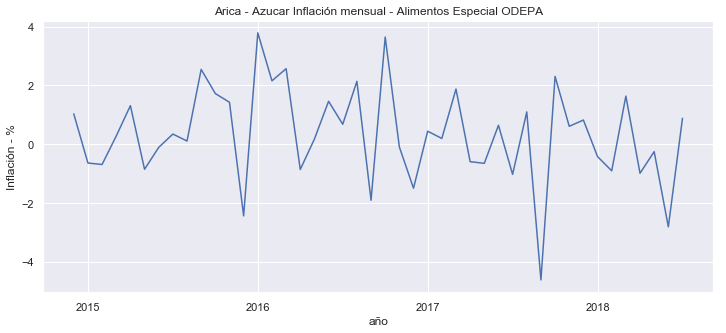

In [11]:
plot_df(inf_mo_ar.Azucar, 12, 5, y_axis='Inflación - %', title='Arica - Azucar Inflación mensual - Alimentos Especial ODEPA')

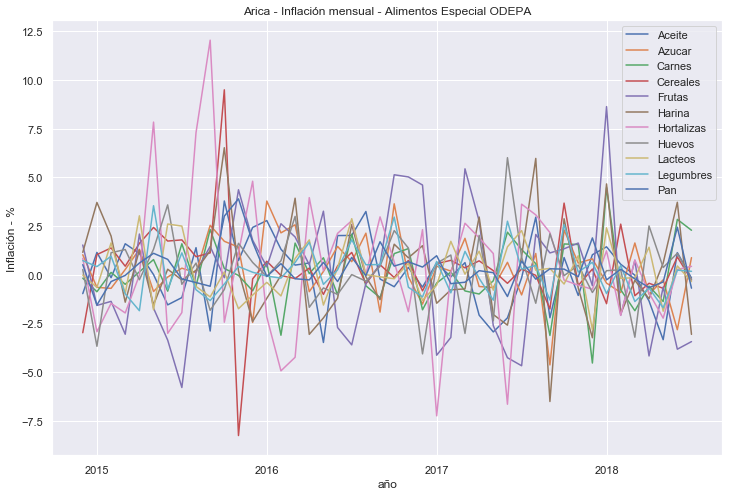

In [12]:
plot_df(inf_mo_ar, 12, 8, y_axis='Inflación - %', title='Arica - Inflación mensual - Alimentos Especial ODEPA')

__Inflación anual Arica__

In [13]:
inf_an_ar = inflacion_periodo(precios_ar, 11, 12)
inf_an_ar.tail()

,Aceite,Azucar,Carnes,Cereales,Frutas,Harina,Hortalizas,Huevos,Lacteos,Legumbres,Pan
2018-03-01,-3.895771,-1.312072,-0.198569,2.384136,3.494600,-0.581418,3.225589,3.802827,4.455757,2.175233,1.901593
2018-04-01,-3.181958,-1.704073,0.209824,1.212379,-3.483198,-4.631683,0.356598,4.295269,4.669905,1.662832,1.017466
2018-05-01,-3.579175,-1.310585,-0.861017,0.297420,-1.512790,-2.060360,-2.938321,7.220833,3.531787,1.264424,0.535589
2018-06-01,-0.277360,-4.703522,-0.222466,1.661139,-1.062960,4.282819,4.257728,2.257135,2.530202,-1.212579,4.154595
2018-07-01,-0.286082,-2.861026,0.755328,1.093725,0.224883,0.144023,1.045146,1.077176,-0.098713,-1.321590,2.716664


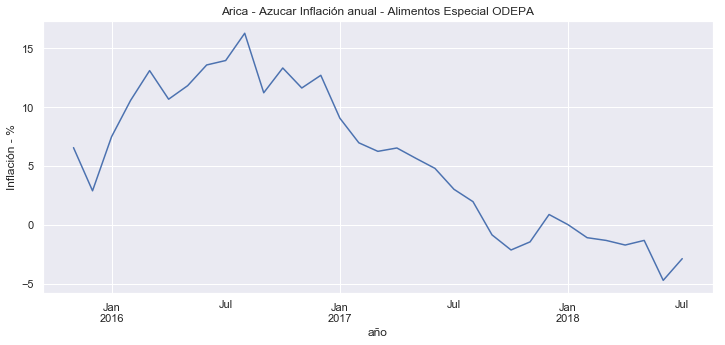

In [14]:
plot_df(inf_an_ar.Azucar, 12, 5, y_axis='Inflación - %', title='Arica - Azucar Inflación anual - Alimentos Especial ODEPA')

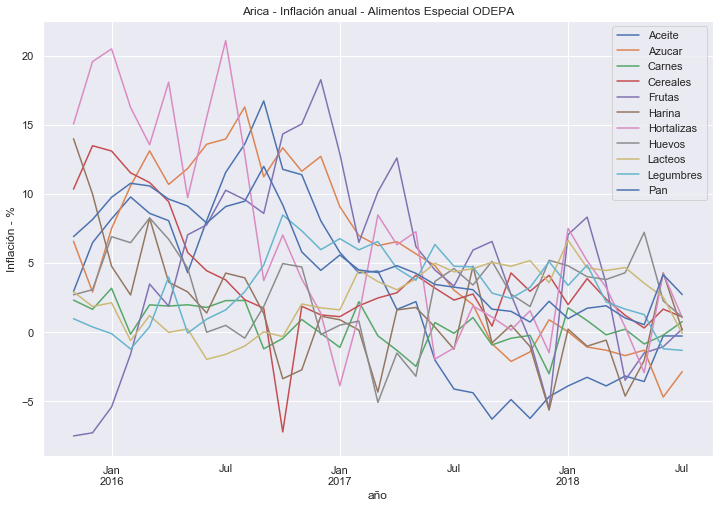

In [15]:
plot_df(inf_an_ar, 12, 8, y_axis='Inflación - %', title='Arica - Inflación anual - Alimentos Especial ODEPA')

### 2. Cálculo de la inflación de alimentos para la región completa (ponderando los productos)

In [16]:
# Inflación mensual
meses = 1
inf_ar = monta_inf('data/data_ar', meses)
inf_ar.head()

OK para 11 categorias de productos


,Aceite,Azucar,Carnes,Cereales,Frutas,Harina,Hortalizas,Huevos,Lacteos,Legumbres,Pan,Inflacion
2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01,-0.024474,0.041597,-0.032525,-0.499265,0.061822,0.033740,0.096102,0.003848,-0.001351,0.082702,0.087462,-0.150343
2015-01-01,0.029184,-0.026034,-0.163407,0.174404,-0.063487,0.108595,-0.331264,-0.052028,-0.064329,0.047846,-0.259920,-0.600441
2015-02-01,-0.003701,-0.028053,0.023173,0.231946,-0.055062,0.058240,-0.166134,0.016096,0.163465,0.108238,-0.058014,0.290196
2015-03-01,0.040443,0.011083,-0.091354,0.074293,-0.123205,-0.041038,-0.222026,0.018411,-0.096322,-0.111283,-0.004911,-0.545908


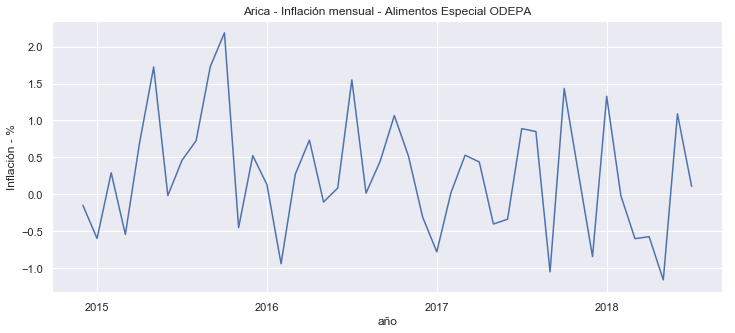

In [17]:
# Plot para toda la región (ponderando los productos)
plot_df(inf_ar.Inflacion, 12, 5, y_axis='Inflación - %', title='Arica - Inflación mensual - Alimentos Especial ODEPA')

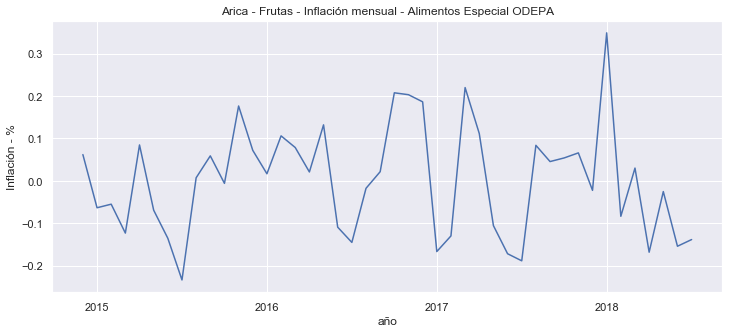

In [18]:
# Plot para la inflación de un producto para la región
plot_df(inf_ar.Frutas, 12, 5, y_axis='Inflación - %', title='Arica - Frutas - Inflación mensual - Alimentos Especial ODEPA')

---
## Parte B - Infalción Mensual  y Anual para todas las regiones

### 1. Importar los datos de inflacion mensual desde los informes de ODEPA por región 

In [19]:
meses = 1 

In [20]:
inf_arica = monta_inf('data/data_ar', meses)
inf_metro = monta_inf('data/data_rm', meses)
inf_rm_po = monta_inf('data/data_po', meses)
inf_rm_su = monta_inf('data/data_su', meses)
inf_rm_no = monta_inf('data/data_no', meses)
inf_rm_ce = monta_inf('data/data_ce', meses)
inf_rm_or = monta_inf('data/data_or', meses)

OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos


### 2. Concatenar las Inflaciónes regionales mensuales en una única tabla

In [21]:
inf = pd.DataFrame(inf_arica['Inflacion'])
inf = pd.concat([inf, inf_metro['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_po['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_su['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_no['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_ce['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_or['Inflacion']], axis =1)
inf.columns = ['Arica', 'Metropolitana', 'Poniente', 'Sur', 'Norte', 'Centro', 'Oriente'] 
inf.head()

,Arica,Metropolitana,Poniente,Sur,Norte,Centro,Oriente
2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01,-0.150343,1.176324,1.072102,0.505962,0.019050,-0.213596,0.320174
2015-01-01,-0.600441,-1.494160,-2.154427,-1.102603,0.493965,-0.293967,-1.364812
2015-02-01,0.290196,1.175542,0.674773,1.292138,0.508098,-0.185431,0.718945
2015-03-01,-0.545908,0.532539,-1.210514,-0.121199,-0.048337,0.910239,0.995312


In [22]:
inf.tail()

,Arica,Metropolitana,Poniente,Sur,Norte,Centro,Oriente
2018-03-01,-0.603658,0.647372,0.386847,-0.514989,1.268549,0.995434,0.614371
2018-04-01,-0.576386,-0.593630,-0.729140,0.130190,-0.277628,-1.147553,0.230017
2018-05-01,-1.163185,0.357994,-0.328756,0.650685,-0.076269,0.210994,0.383373
2018-06-01,1.089960,-0.516156,-0.535520,-0.604959,-1.276117,0.675814,-0.858617
2018-07-01,0.106212,-0.205333,0.046142,-1.148108,0.540598,-0.880753,1.387133


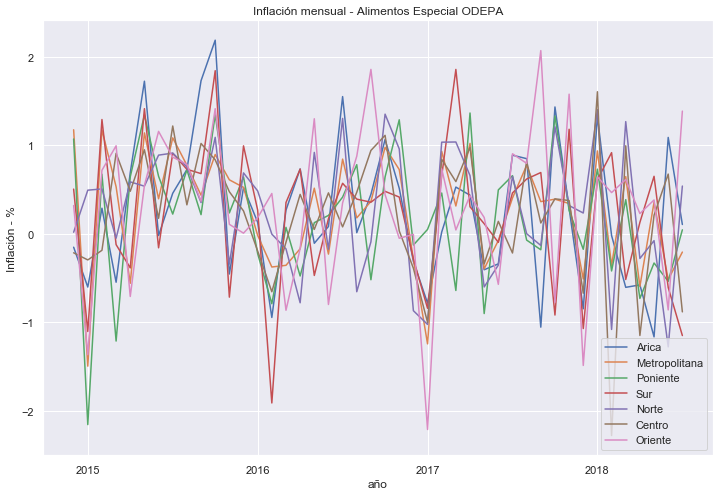

In [23]:
# Plot para la inflación de un producto para la región
plot_df(inf, 12, 8, y_axis='Inflación - %', title='Inflación mensual - Alimentos Especial ODEPA')

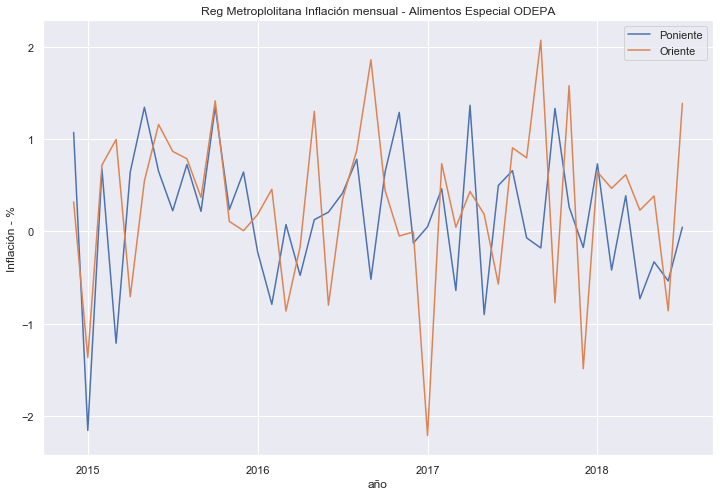

In [24]:
# Plot para la inflación en dos setores de la Región Metroploitana
plot_df(inf[['Poniente', 'Oriente']], 12, 8, y_axis='Inflación - %', title='Reg Metroplolitana Inflación mensual - Alimentos Especial ODEPA')

### 3. Importar los datos de inflacion anual desde los informes de ODEPA por región 

In [25]:
meses = 12 

inf_arica = monta_inf('data/data_ar', meses)
inf_metro = monta_inf('data/data_rm', meses)
inf_rm_po = monta_inf('data/data_po', meses)
inf_rm_su = monta_inf('data/data_su', meses)
inf_rm_no = monta_inf('data/data_no', meses)
inf_rm_ce = monta_inf('data/data_ce', meses)
inf_rm_or = monta_inf('data/data_or', meses)

OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos
OK para 11 categorias de productos


### 4. Concatenar las Inflaciónes regionales anuales en una única tabla

In [26]:
inf = pd.DataFrame(inf_arica['Inflacion'])
inf = pd.concat([inf, inf_metro['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_po['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_su['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_no['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_ce['Inflacion']], axis =1)
inf = pd.concat([inf, inf_rm_or['Inflacion']], axis =1)
inf.columns = ['Arica', 'Metropolitana', 'Poniente', 'Sur', 'Norte', 'Centro', 'Oriente'] 
inf.head()

,Arica,Metropolitana,Poniente,Sur,Norte,Centro,Oriente
2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
inf.tail()

,Arica,Metropolitana,Poniente,Sur,Norte,Centro,Oriente
2018-03-01,1.765276,3.494489,3.415508,2.213964,3.509091,1.760508,4.826864
2018-04-01,0.743888,1.823613,1.267601,2.046628,2.534400,-0.380625,4.541095
2018-05-01,-0.022482,2.599958,1.849519,2.595858,3.041526,0.185905,4.759295
2018-06-01,1.449631,2.147658,0.832510,2.065034,2.113950,0.724336,4.438815
2018-07-01,0.646683,1.540573,0.238617,0.421381,2.008591,0.044754,4.946702


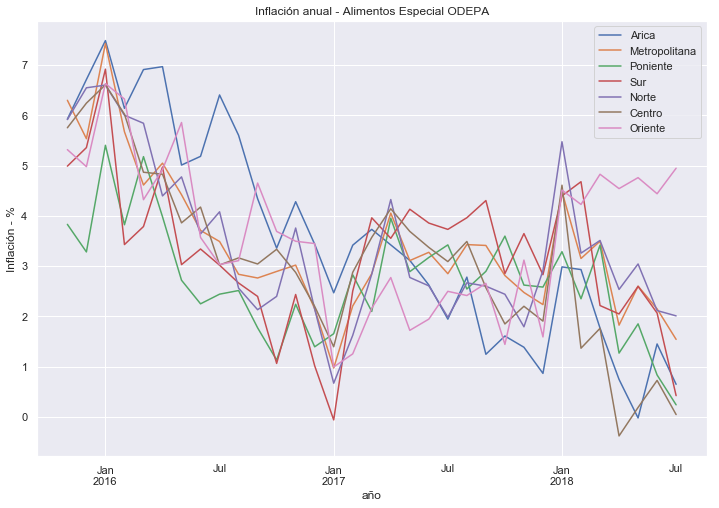

In [28]:
# Plot para la inflación de un producto para la región
plot_df(inf, 12, 8, y_axis='Inflación - %', title='Inflación anual - Alimentos Especial ODEPA')

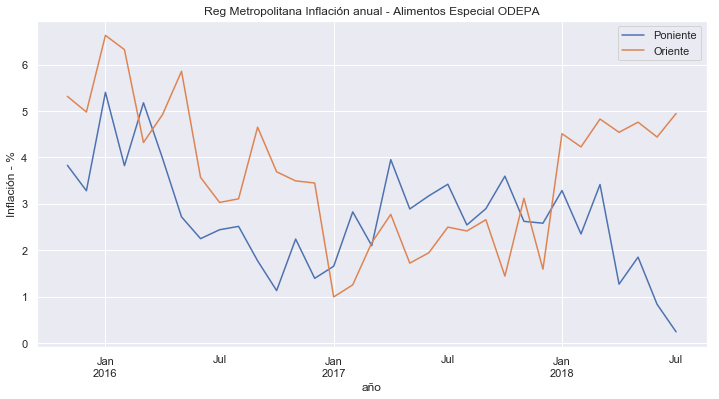

In [32]:
# Plot para la inflación en dos setores de la Región Metropolitana
plot_df(inf[['Poniente', 'Oriente']], 12, 6, y_axis='Inflación - %', 
        title='Reg Metropolitana Inflación anual - Alimentos Especial ODEPA')

__Análisis:__ Observe que la inflación en los últimos 12 meses en la región Poniente es cerca de cero (0,24%),<br>
encuanto la inflación en el mismo período para la región Oriente de santiago, es de aprox. 5% (4.95%)